<a href="https://colab.research.google.com/github/Ishank2301/Pratise-ML-Algorithums/blob/main/random_forest_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Random Forest Regression

## Importing the libraries

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [7]:
dataset = pd.read_csv('Position_Salaries.csv')
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values

## Training the Random Forest Regression model on the whole dataset

In [8]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(X, y)

RandomForestRegressor(n_estimators=10, random_state=0)

## Predicting a new result

In [9]:
regressor.predict([[6.5]])

array([167000.])

## Visualising the Random Forest Regression results (higher resolution)

/tmp/ipython-input-230117209.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid = np.arange(min(X), max(X), 0.01)


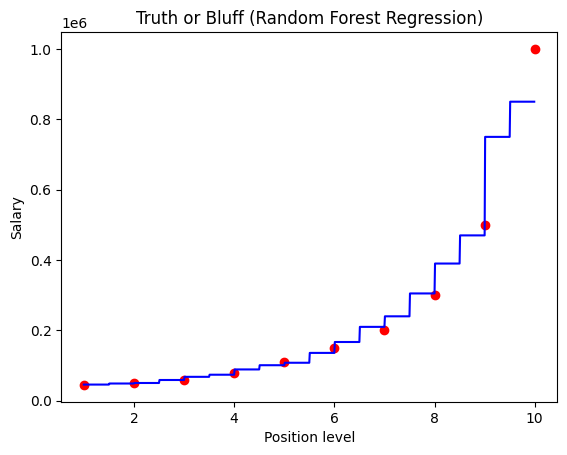

In [10]:
X_grid = np.arange(min(X), max(X), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, regressor.predict(X_grid), color = 'blue')
plt.title('Truth or Bluff (Random Forest Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

# Let's refine this to the extreme

/tmp/ipython-input-2394366258.py:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid = np.arange(min(X), max(X), 0.01)


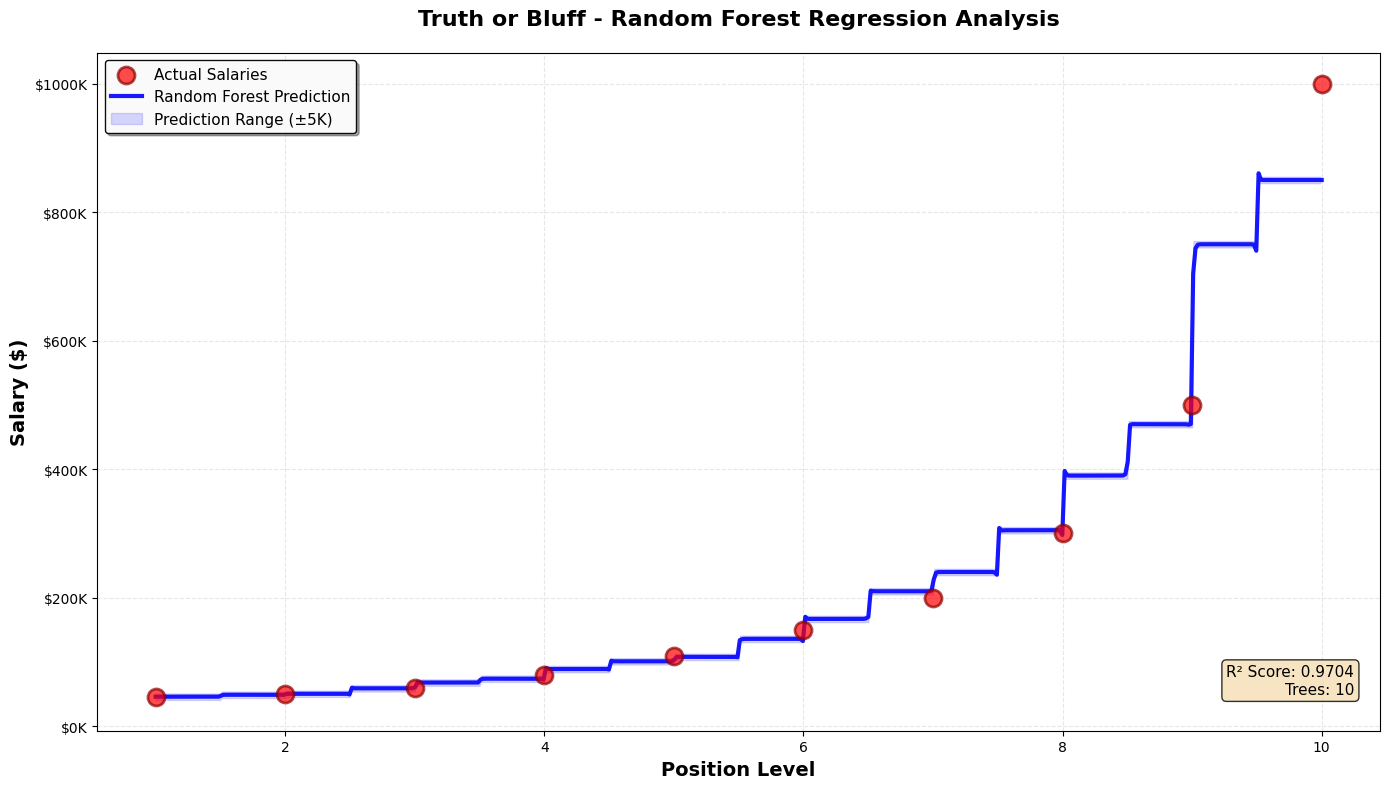

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline

# Create a more refined grid for smoother predictions
X_grid = np.arange(min(X), max(X), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
y_pred = regressor.predict(X_grid)

# Smooth the prediction line using spline interpolation
spl = make_interp_spline(X_grid.flatten(), y_pred, k=3)
X_smooth = np.linspace(min(X), max(X), 500)
y_smooth = spl(X_smooth)

# Create figure with better size and DPI
fig, ax = plt.subplots(figsize=(14, 8), dpi=100)

# Plot 1: Actual data points with better styling
scatter = ax.scatter(X, y, color='red', s=150, alpha=0.7,
                     edgecolors='darkred', linewidth=2,
                     label='Actual Salaries', zorder=3)

# Plot 2: Smooth prediction line
ax.plot(X_smooth, y_smooth, color='blue', linewidth=3,
        label='Random Forest Prediction', zorder=2, alpha=0.9)

# Plot 3: Add confidence band/envelope (optional)
y_pred_grid = regressor.predict(X_grid)
ax.fill_between(X_grid.flatten(), y_pred_grid - 5000, y_pred_grid + 5000,
                alpha=0.15, color='blue', label='Prediction Range (±5K)', zorder=1)

# Styling improvements
ax.set_xlabel('Position Level', fontsize=14, fontweight='bold')
ax.set_ylabel('Salary ($)', fontsize=14, fontweight='bold')
ax.set_title('Truth or Bluff - Random Forest Regression Analysis',
             fontsize=16, fontweight='bold', pad=20)

# Grid
ax.grid(True, alpha=0.3, linestyle='--', linewidth=0.8)
ax.set_axisbelow(True)

# Format y-axis as currency
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x/1000:.0f}K'))

# Legend with better styling
ax.legend(fontsize=11, loc='upper left', framealpha=0.95,
          edgecolor='black', fancybox=True, shadow=True)

# Add some statistics as text
r2_score = regressor.score(X, y)
n_trees = regressor.n_estimators
ax.text(0.98, 0.05, f'R² Score: {r2_score:.4f}\nTrees: {n_trees}',
        transform=ax.transAxes, fontsize=11, verticalalignment='bottom',
        horizontalalignment='right', bbox=dict(boxstyle='round',
        facecolor='wheat', alpha=0.8))

# Tight layout for better spacing
plt.tight_layout()
plt.show()